(100, 29, 7)
8 10 0.3978223147754169
10 12 0.3979497851559297
12 16 0.3984524819437412
16 20 0.3986033652349426
20 24 0.39889947235873024
24 32 0.39964440862359557
[0.39856197134872606] [0.0009006801264851355]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20
4 0.04564354645876384 20 24
5 0.036084391824351615 24 32
8 10 0.4870908811784664
10 12 0.48754227347296186
12 16 0.487508815221564
16 20 0.4869638381574239
[0.487276452007604] [0.005245338942654039]
0.48703707182630357 0.00011384982588546169 0.487276452007604
[0.1] []


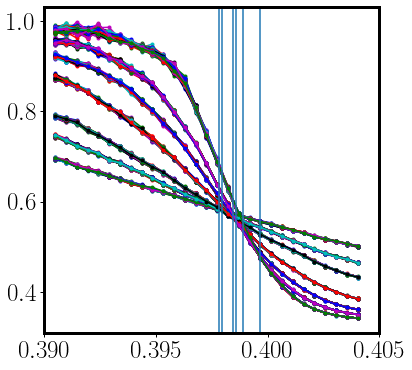

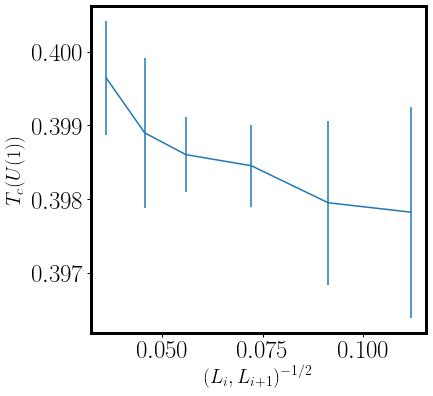

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


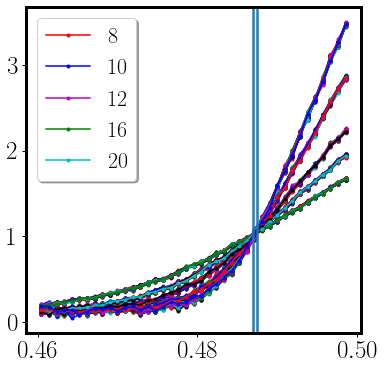

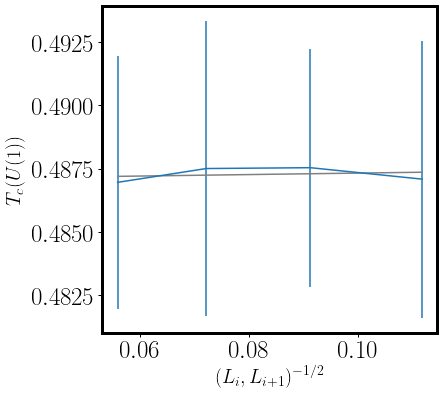

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit


plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

##############################
def linear_fit(x,a,b):
    return a*x +b

##############################

betac_U1=[]
betac_U1_err=[]
betac_Z2=[]
betac_Z2_err=[]
delta_beta=[]
eta2_list=[]

################

e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=0.1
blow=0.39
bhigh=0.405
Hinit=1
nMAX=30
nbeta=64

eta2_list.append(eta2)

L=np.array([8, 10, 12, 16, 20, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.39
bmax=0.405

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

betac_Z2.append(np.mean(betac_finitesize))
betac_Z2_err.append(np.mean( err_betac_finitesize) )
print(betac_Z2, betac_Z2_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

#######################################################

blow=0.45
bhigh=0.51
Hinit=1


L=np.array([8, 10, 12, 16, 20])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)

bmin=0.46
bmax=0.5
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            #print(np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0])
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

betac_U1.append(np.mean(betac_finitesize))
betac_U1_err.append(np.mean( err_betac_finitesize) )
print(betac_U1, betac_U1_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    
betac_finitesize=np.asarray(betac_finitesize)
err_betac_finitesize=np.asarray(err_betac_finitesize)
a0=betac_finitesize[1]-betac_finitesize[0]
b0=betac_finitesize[0]
popt, pcov = curve_fit(linear_fit, pair_l , betac_finitesize, sigma=err_betac_finitesize, absolute_sigma=True, p0=(a0,b0))
print(popt[1], pcov[1,1], np.mean(betac_finitesize))
ax2.plot(pair_l, linear_fit(pair_l,*popt), ls="-", c="gray" )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

#####################

#delta_beta.append(np.sqrt((betac_U1- betac_Z2)*(betac_U1- betac_Z2)))
print(eta2_list, delta_beta )



(100, 31, 7)
8 10 0.38938097631755164
10 12 0.38925352192777213
12 16 0.38959070288542136
16 20 0.38956377526846403
20 24 0.38950511055669607
24 32 0.38985565276643086
[0.39856197134872606, 0.38952495662038933] [0.0009006801264851355, 0.0009326578729689948]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.05590169943749474 16 20
4 0.04564354645876384 20 24
5 0.036084391824351615 24 32
8 10 0.5008412040759952
10 12 0.5002768815036306
12 16 0.4991278605858745
16 20 0.49949271801291756
20 24 0.49875060887546385
24 32 0.4955499600406201
[0.487276452007604, 0.49900653884908364] [0.005245338942654039, 0.01068218674436408]
0.49703912587058624 7.819826312344309e-05 0.49900653884908364
[0.1, 0.5] []


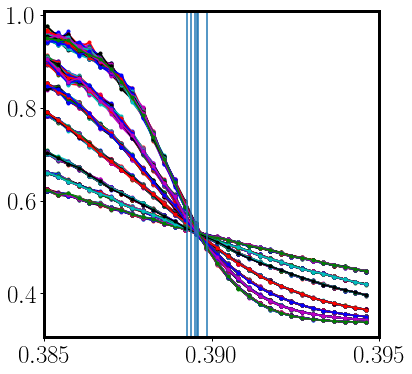

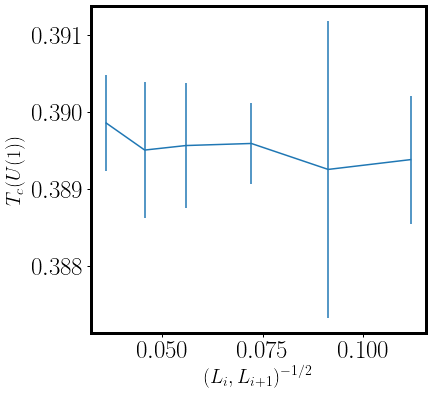

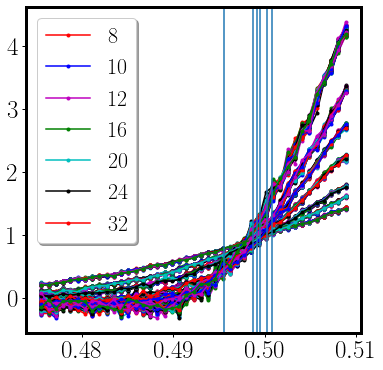

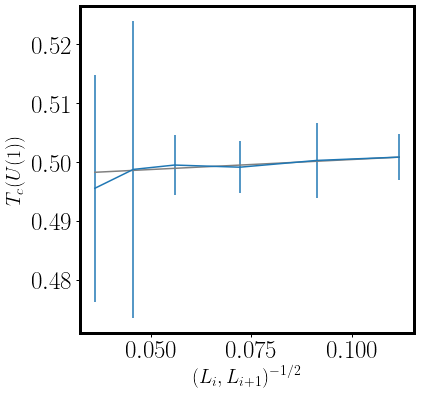

In [2]:

e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=0.5
blow=0.38
bhigh=0.4
Hinit=1
nMAX=30
nbeta=64

eta2_list.append(eta2)

L=np.array([8, 10, 12, 16, 20, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.385
bmax=0.395

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

betac_Z2.append(np.mean(betac_finitesize))
betac_Z2_err.append(np.mean( err_betac_finitesize) )
print(betac_Z2, betac_Z2_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

#######################################################

blow=0.47
bhigh=0.52
Hinit=1


L=np.array([8, 10, 12, 16, 20, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)

bmin=0.475
bmax=0.51
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            #print(np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0])
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

betac_U1.append(np.mean(betac_finitesize))
betac_U1_err.append(np.mean( err_betac_finitesize) )
print(betac_U1, betac_U1_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    
betac_finitesize=np.asarray(betac_finitesize)
err_betac_finitesize=np.asarray(err_betac_finitesize)
a0=betac_finitesize[1]-betac_finitesize[0]
b0=betac_finitesize[0]
popt, pcov = curve_fit(linear_fit, pair_l , betac_finitesize, sigma=err_betac_finitesize, absolute_sigma=True, p0=(a0,b0))
print(popt[1], pcov[1,1], np.mean(betac_finitesize))
ax2.plot(pair_l, linear_fit(pair_l,*popt), ls="-", c="gray" )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

#####################

#delta_beta.append(np.sqrt((betac_U1- betac_Z2)*(betac_U1- betac_Z2)))
print(eta2_list, delta_beta )


(100, 40, 6)
8 10 0.3836441123437245
10 12 0.3835262293195054
12 16 0.38354371782320107
16 24 0.38350223782941595
24 32 0.38363752632319653
[0.39856197134872606, 0.38952495662038933, 0.3835707647278087] [0.0009006801264851355, 0.0009326578729689948, 0.0006816197431133298]
0 0.11180339887498948 8 10
1 0.09128709291752768 10 12
2 0.07216878364870323 12 16
3 0.051031036307982884 16 24
4 0.036084391824351615 24 32
8 10 0.5291169702245143
10 12 0.5276822757016
12 16 0.5255011098576098
16 24 0.522210068847249
24 32 0.5211020170493907
[0.487276452007604, 0.49900653884908364, 0.5251224883360728] [0.005245338942654039, 0.01068218674436408, 0.006187769354459681]
0.5168999445091176 3.1877882463893544e-05 0.5251224883360728
[0.1, 0.5, 1] []


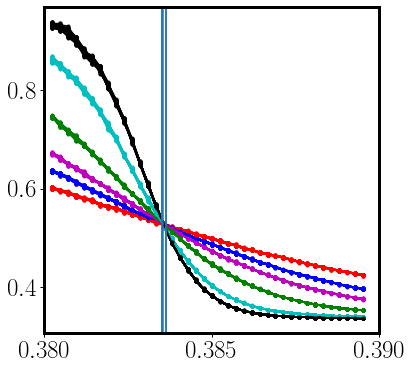

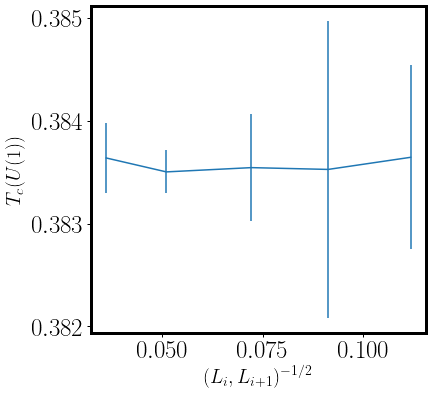

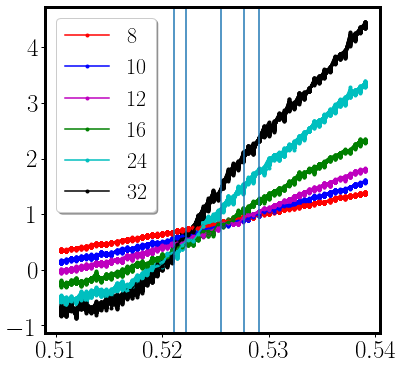

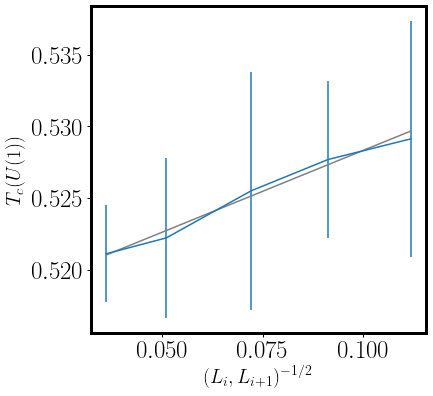

In [3]:

e=0
nu=0.65
h=1
rho=1
eta1=0
eta2=1
blow=0.375
bhigh=0.39
Hinit=1
nMAX=30
nbeta=64

eta2_list.append(eta2)

L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)



N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


bmin=0.38
bmax=0.39

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
ax1.set_xlim(bmin, bmax)

from cycler import cycler
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)


HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
beta= data_U[0]
U= data_U[1]
err_U= data_U[2]
U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
#cut U_all
end=np.where((beta<bmax))[0][-1]
start=np.where((beta>bmin))[0][0]
nbeta_cut=end-start


U_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
print(np.shape(U_cross))
for n in range(N_dataset):
    for l in range(len(L)):
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
        beta= data_U[0]
        U_all=np.loadtxt("%s/Binder_alln.txt" %HOMEDIR)
        #cut U_all
        beta=beta[start:end]
        U_cross[n, :, l]=U_all[n][start:end]
        ax1.plot(beta, U_cross[n,:,l], ".-")
    #ax1.plot(beta, Js_cross[18,:,l], ".-")

for n in range(N_dataset):       
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>=Js_cross[n,:, l2])[0][-1]])
            condition=np.where(U_cross[n,:, l1]>(U_cross[n,:, l2]))[0]
            if(condition.size>0):
                #print(condition)
                index1=condition[0]
                index2=index1-1
                x1= beta[index1]
                y1= U_cross[n,index1, l1]
                x2= beta[index2] 
                y2=U_cross[n,index2, l1]
                m1= (y1-y2)/(x1-x2)
                q1= -x2*m1+y2
                y1= U_cross[n,index1, l2]
                y2=U_cross[n,index2, l2]
                m2= (y1-y2)/(x1-x2)
                q2= -x2*m2+y2
                betac_cross[n,l2-1]=(q2-q1)/(m1-m2)
            else:
               print("nada")
betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

betac_Z2.append(np.mean(betac_finitesize))
betac_Z2_err.append(np.mean( err_betac_finitesize) )
print(betac_Z2, betac_Z2_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    print(l, pair_l[l], L[l], L[l+1] )
    
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )
#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

#######################################################

blow=0.51
bhigh=0.54
Hinit=0


L=np.array([8, 10, 12, 16, 24, 32])

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/h_%s" %(e, nu, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(L))))
c_m=next(color)

bmin=0.51
bmax=0.54
HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[0], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
start=np.where(beta>bmin)[0][0]
end=np.where(beta<bmax)[0][-1]
nbeta_cut=end-start

N_dataset=100
betac_cross=np.zeros((N_dataset, len(L)-1))


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#ax1.set_xlim(0.336, 0.341)
#ax1.set_ylim((0,5))
from cycler import cycler

custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)

Js_cross=np.zeros((N_dataset, nbeta_cut, len(L)))
for n in range(N_dataset):
    for l in range(len(L)):
        #c_m=next(color)
        HOMEDIR=("%s/L%s_rho%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" %(BASEDIR, L[l], rho, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
      
        beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
        beta=beta[start:end]
        Js_all=np.loadtxt("%s/Jsum_alln.txt" %HOMEDIR)
        Js_cross[:, :, l]=L[l]*Js_all[n][start:end]
        ax1.plot(beta, Js_cross[n,:,l], ".-", label="%s" %L[l])
    if(n==0): ax1.legend(loc='best')

        
    for l1 in range(len(L)):
        for l2 in range(l1+1, len(L)):
            #print(beta[np.where(Js_cross[n,:, l1]>Js_cross[n,:, l2])[0][-1]])
            #Return the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate
            index1=np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0][-1]
            #print(np.where(Js_cross[n,:, l2]< (Js_cross[n,:, l1]))[0])
            index2=index1+1
            x1= beta[index1]
            y1= Js_cross[n,index1, l1]
            x2= beta[index2] 
            y2=Js_cross[n,index2, l1]
            m1= (y1-y2)/(x1-x2)
            q1= -x2*m1+y2
            y1= Js_cross[n,index1, l2]
            y2=Js_cross[n,index2, l2]
            m2= (y1-y2)/(x1-x2)
            q2= -x2*m2+y2
            betac_cross[n,l2-1]=(q2-q1)/(m1-m2)

betac_finitesize=[]
err_betac_finitesize=[]
custom_cycler = (cycler(color=['r','b','m','g', 'c', 'k']))
ax1.set_prop_cycle(custom_cycler)
for l2 in range(1, len(L)):
    print(L[l2-1], L[l2], np.mean(betac_cross[:,l2-1]))
    ax1.axvline(x=np.mean(betac_cross[:,l2-1]))
    betac_finitesize.append(np.mean(betac_cross[:,l2-1]))
    err_betac_finitesize.append(np.sqrt(N_dataset-1)*np.std(betac_cross[:,l2-1]))

betac_U1.append(np.mean(betac_finitesize))
betac_U1_err.append(np.mean( err_betac_finitesize) )
print(betac_U1, betac_U1_err)

fig2, ax2 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
 
ax2.set_xticks(np.arange(0, len(L)-1, step=1), ('$L_1, L_2$', '$L_2, L_3$'))
#ax2.set_xscale("log")
ax2.set_ylabel("$T_c(U(1))$")
ax2.set_xlabel("($L_{i}, L_{i+1})^{-1/2}$")
pair_l=[]

pair_l=np.zeros(len(L)-1)
for l in range(len(L)-1):
    pair_l[l]=1./np.sqrt(L[l]*L[l+1])
    
betac_finitesize=np.asarray(betac_finitesize)
err_betac_finitesize=np.asarray(err_betac_finitesize)
a0=betac_finitesize[1]-betac_finitesize[0]
b0=betac_finitesize[0]
popt, pcov = curve_fit(linear_fit, pair_l , betac_finitesize, sigma=err_betac_finitesize, absolute_sigma=True, p0=(a0,b0))
print(popt[1], pcov[1,1], np.mean(betac_finitesize))
ax2.plot(pair_l, linear_fit(pair_l,*popt), ls="-", c="gray" )
ax2.errorbar(pair_l, np.asarray(betac_finitesize), yerr=np.asarray(err_betac_finitesize), fmt="-" )#ax2.plot(pair_l, np.asarray(betac_finitesize), "o-" )

#####################

#delta_beta.append(np.sqrt((betac_U1- betac_Z2)*(betac_U1- betac_Z2)))
print(eta2_list, delta_beta )


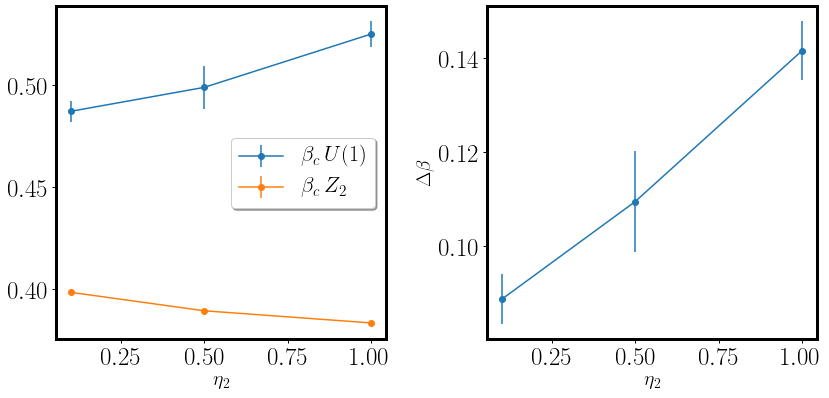

In [10]:
fig, ax1 = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12,6))
eta2_list=np.asarray(eta2_list)
betac_U1=np.asarray(betac_U1)
betac_Z2=np.asarray(betac_Z2)
betac_U1_err=np.asarray(betac_U1_err)
betac_Z2_err=np.asarray(betac_Z2_err)
ax1[1].set_ylabel(r"$\Delta \beta$")
ax1[1].set_xlabel(r"$\eta_2$")
ax1[0].set_xlabel(r"$\eta_2$")

ax1[0].errorbar(eta2_list, betac_U1, yerr=betac_U1_err, fmt='o-', label=r"$\beta_c \, U(1)$")
ax1[0].errorbar(eta2_list, betac_Z2, yerr=betac_Z2_err, fmt='o-', label=r"$\beta_c \,Z_2$")
#ax1[0].axhline(y=0.57)
ax1[0].legend(loc="best")
ax1[1].errorbar(eta2_list, betac_U1-betac_Z2, yerr=np.sqrt(betac_Z2_err*betac_Z2_err+ betac_U1_err*betac_U1_err ) , fmt='o-')
fig.tight_layout()
fig.savefig("%s/deltabetas_nu0.65_eta2.png" %folder_fig)